#LLM LLAVA Model

In [3]:
! git clone https://github.com/mbzuai-oryx/LLaVA-pp.git
%cd LLaVA-pp
! git submodule update --init --recursive

Cloning into 'LLaVA-pp'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 71 (delta 31), reused 60 (delta 20), pack-reused 0
Receiving objects: 100% (71/71), 6.47 MiB | 29.69 MiB/s, done.
Resolving deltas: 100% (31/31), done.
/content/LLaVA-pp
Submodule 'LLaVA' (https://github.com/haotian-liu/LLaVA) registered for path 'LLaVA'
Cloning into '/content/LLaVA-pp/LLaVA'...
Submodule path 'LLaVA': checked out '3e337ad269da3245643a2724a1d694b5839c37f9'


In [4]:
! cp Phi-3-V/train.py LLaVA/llava/train/train.py
! cp Phi-3-V/llava_phi3.py LLaVA/llava/model/language_model/llava_phi3.py
! cp Phi-3-V/builder.py LLaVA/llava/model/builder.py
! cp Phi-3-V/model__init__.py LLaVA/llava/model/__init__.py
! cp Phi-3-V/main__init__.py LLaVA/llava/__init__.py
! cp Phi-3-V/conversation.py LLaVA/llava/conversation.py

In [5]:
%cd LLaVA
! pip install --upgrade pip
! pip install -e .
! pip install git+https://github.com/huggingface/transformers@a98c41798cf6ed99e1ff17e3792d6e06a2ff2ff3

! export PYTHONPATH="./:$PYTHONPATH"

/content/LLaVA-pp/LLaVA
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
Obtaining file:///content/LLaVA-pp/LLaVA
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of typer[all] to determine which version is compatible with other requirements. This could tak

In [6]:
! git lfs install
! git clone https://huggingface.co/MBZUAI/LLaVA-Phi-3-mini-4k-instruct

Updated git hooks.
Git LFS initialized.
Cloning into 'LLaVA-Phi-3-mini-4k-instruct'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 27 (delta 7), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (27/27), 11.17 KiB | 952.00 KiB/s, done.
Filtering content: 100% (3/3), 3.70 GiB | 15.81 MiB/s, done.
Encountered 1 file(s) that may not have been copied correctly on Windows:
	model-00001-of-00002.safetensors

See: `git lfs help smudge` for more details.


In [7]:
import torch
from llava.constants import IMAGE_TOKEN_INDEX, DEFAULT_IMAGE_TOKEN, DEFAULT_IM_START_TOKEN, DEFAULT_IM_END_TOKEN, IMAGE_PLACEHOLDER
from llava.conversation import conv_templates
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init
from llava.mm_utils import process_images, tokenizer_image_token, get_model_name_from_path
import requests
from PIL import Image
from io import BytesIO
import re
from llava.utils import disable_torch_init

In [8]:
def image_parser(args):
    out = args.image_file.split(args.sep)
    return out


def load_image(image_file):
    if image_file.startswith("http") or image_file.startswith("https"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image


def load_images(image_files):
    out = []
    for image_file in image_files:
        image = load_image(image_file)
        out.append(image)
    return out

In [9]:
disable_torch_init()

model_path = "LLaVA-Phi-3-mini-4k-instruct"
model_name = get_model_name_from_path(model_path)
tokenizer, model, image_processor, context_len = load_pretrained_model(model_path, None, model_name)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of the model checkpoint at LLaVA-Phi-3-mini-4k-instruct were not used when initializing LlavaPhiForCausalLM: ['model.vision_tower.vision_tower.vision_model.embeddings.class_embedding', 'model.vision_tower.vision_tower.vision_model.embeddings.patch_embedding.weight', 'model.vision_tower.vision_tower.vision_model.embeddings.position_embedding.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.layer_norm2.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc1.weight', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.fc2.bias', 'model.vision_tower.vision_tower.vision_model.encoder.layers.0.mlp.

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [10]:
qs = f"Describe the image in detail , explaining whether the hoarding is illegal , in the sensose of general rule , like size , put on a tree , on lights poles , or distracting to people on high ways , need to evaluate as a hazadours evaluation"
conv_mode = "phi3_instruct"

image_token_se = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN
if IMAGE_PLACEHOLDER in qs:
    if model.config.mm_use_im_start_end:
        qs = re.sub(IMAGE_PLACEHOLDER, image_token_se, qs)
    else:
        qs = re.sub(IMAGE_PLACEHOLDER, DEFAULT_IMAGE_TOKEN, qs)
else:
    if model.config.mm_use_im_start_end:
        qs = image_token_se + "\n" + qs
    else:
        qs = DEFAULT_IMAGE_TOKEN + "\n" + qs

conv = conv_templates[conv_mode].copy()
conv.append_message(conv.roles[0], qs)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

print(prompt)

<|system|>
You are a helpful AI assistant.<|end|>
<|user|>
<image>
Describe the image in detail.<|end|>
<|assistant|>



# Streamlit

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!pip install streamlit -q
! pip install streamlit pandas Pillow streamlit_drawable_canvas streamlit_js_eval streamlit_folium
! pip install pyngrok
!npm install localtunnel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.7/326.7 kB 12.2 MB/s eta 0:00:00
npm WARN saveError ENOENT: no such file or directory, open '/content/LLaVA-pp/LLaVA/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/LLaVA-pp/LLaVA/package.json'
npm WARN LLaVA No description
npm WARN LLaVA No repository field.
npm WARN LLaVA No README data
npm WARN LLaVA No license field.

+ localtunnel@2.0.2
added 22 packages from 22 co

In [14]:
%%writefile app.py
import streamlit as st
import json
import folium
import pandas as pd
from PIL import Image
from streamlit_drawable_canvas import st_canvas
import os

loc = False

from streamlit_js_eval import streamlit_js_eval, copy_to_clipboard, create_share_link, get_geolocation
from streamlit_folium import st_folium

st.write("# Project Helious")

st.write("## Capture Illegal Hoarding")
bg_image = st.camera_input("Camera")


save_directory = "/content/images"

# Save the input image to the directory
if bg_image:
    # Create the directory if it doesn't exist
    os.makedirs(save_directory, exist_ok=True)

    # Save the image with a unique filename
    image_filename = "input_image.jpg"
    image_path = os.path.join(save_directory, image_filename)
    with open(image_path, "wb") as f:
        f.write(bg_image.read())

    st.success(f"Image saved successfully at: {image_path}")

    # Debugging: Print the directory and image path
    print("Save directory:", save_directory)
    print("Image path:", image_path)

if bg_image:
    st.text_input("Describe the Image")
if bg_image:
    st.write("## Your Current Location is:")

    if st.toggle("Get Location"):
        loc = get_geolocation()

        # Check if loc is not None
        if loc:
            # Extracting latitude and longitude
            latitude = loc['coords']['latitude']
            longitude = loc['coords']['longitude']

            # Displaying the coordinates
            st.write(f"Your coordinates are (Latitude: {latitude}, Longitude: {longitude})")
            # center on Liberty Bell, add marker
            m = folium.Map(location=[latitude, longitude], zoom_start=16)
            folium.Marker([latitude, longitude], popup="Liberty Bell", tooltip="Liberty Bell").add_to(m)
            # call to render Folium map in Streamlit
            st_data = st_folium(m, width=725)


        else:
            st.write("Could not retrieve location data.")

    if loc:
        # Specify canvas parameters in application
        stroke_width = st.slider("Stroke width: ", 1, 10, 2)

        # Create a canvas component
        canvas_result = st_canvas(
            fill_color="rgba(255, 165, 0, 0.3)",  # Fixed fill color with some opacity
            stroke_width= stroke_width,
            stroke_color= "#FF0000",
            background_color= "#EEEEEE",
            background_image=Image.open(bg_image) if bg_image else None,
            update_streamlit=True,
            height=500,
            drawing_mode="rect",
            key="canvas",
        )



        # Do something interesting with the image data and paths
        # if canvas_result.image_data is not None:
        #     st.image(canvas_result.image_data)
        if canvas_result.json_data is not None:
            objects = pd.json_normalize(canvas_result.json_data["objects"]) # need to convert obj to str because PyArrow
            for col in objects.select_dtypes(include=['object']).columns:
                objects[col] = objects[col].astype("str")
            st.dataframe(objects)



        st.write(f"\n{outputs}\n")
        if st.button("Done!!!!"):
            # st.balloons()
            st.success('Thank You for your Response', icon="✅")







Writing app.py


#RUN Website


In [15]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 35.233.174.37


In [16]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501

npx: installed 22 in 1.77s
your url is: https://rich-rocks-show.loca.lt
^C


In [17]:
# Check disk usage
!df -h

# Clear disk space by removing unused files
!find /content -name "*.zip" -delete
!find /content -name "*.rar" -delete
!find /content -name "*.7z" -delete
!find /content -name "*.gz" -delete
!find /content -name "*.bz2" -delete
!find /content -name "*.xz" -delete
!find /content -name "*.iso" -delete
!find /content -name "*.dmg" -delete
!find /content -name "*.img" -delete
!find /content -name "*.tar" -delete
!find /content -name "*.csv" -delete
!find /content -name "*.json" -delete
!find /content -name "*.xml" -delete
!find /content -name "*.html" -delete
!find /content -name "*.pdf" -delete
!find /content -name "*.doc" -delete
!find /content -name "*.docx" -delete
!find /content -name "*.xls" -delete
!find /content -name "*.xlsx" -delete
!find /content -name "*.ppt" -delete
!find /content -name "*.pptx" -delete

# Check disk usage again
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   52G   27G  67% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G  4.0K  5.7G   1% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1       119G   96G   24G  81% /kaggle/input
tmpfs           6.4G  3.9M  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G   11M   15G   1% /content/drive
Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   52G   27G  67% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G  4.0K  5.7G   1% /dev/shm
/dev/root       2.0G  1.2G  820M  59% /usr/sbin/docker-init
/dev/sda1       119G   96G   24G  81% /kaggle/input
tmpfs           6.4G  3.9M  6.4G   1% /var/colab
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4

#Image input segment

(-0.5, 703.5, 395.5, -0.5)

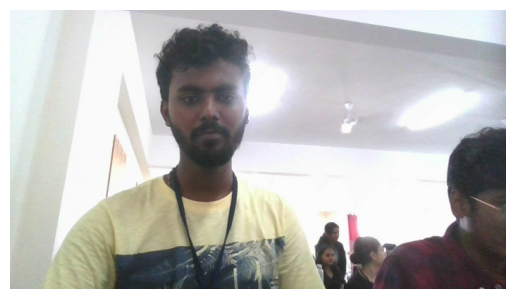

In [23]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import torch

# Assuming these functions are defined elsewhere in your code or need to be defined
from llava.mm_utils import process_images, tokenizer_image_token
from llava.conversation import conv_templates
from llava.model.builder import load_pretrained_model
from llava.utils import disable_torch_init

# Define the function to load an image
def load_image(image_path):
    return Image.open(image_path).convert("RGB")

# Set the directory where your images are located
image_directory = "/content/images"

# List all files in the image directory
image_files = os.listdir(image_directory)

# Select the first image for demonstration purposes
image_name = image_files[0]

# Load the image from the image directory
image_path = os.path.join(image_directory, image_name)
image = load_image(image_path)

# Display the loaded image
plt.imshow(image)
plt.axis('off')
#plt.show()

In [26]:
image_name = "/content/images/input_image.jpg"
image_files = [image_name]
images = load_images(image_files)
image_sizes = [x.size for x in images]
images_tensor = process_images(
    images,
    image_processor,
    model.config
).to(model.device, dtype=torch.float16)

input_ids = (
    tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
    .unsqueeze(0)
    .cuda()
)

In [27]:
temperature = 0.2
top_p = 0.7
num_beams = 1
max_new_tokens = 512

with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=images_tensor,
        image_sizes=image_sizes,
        do_sample=True if temperature > 0 else False,
        temperature=temperature,
        top_p=top_p,
        num_beams=num_beams,
        max_new_tokens=max_new_tokens,
        use_cache=True,
    )

outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
outputs = outputs.replace("<|end|>", "").strip()
print(f"\n{outputs}\n")

You are not running the flash-attention implementation, expect numerical differences.



The image features a man standing in a room, wearing a yellow shirt and a lanyard around his neck. He appears to be looking at the camera, possibly posing for a picture. The room is filled with several other people, some of whom are also wearing lanyards. 

In the background, there is a dining table with a few chairs placed around it. The room seems to be a gathering place, with people engaged in conversations or other activities.

